# Module 2: Text into Data: Importing a Text

* DS 5001: Exploratory Text Analytics
* Raf Alvarado

# Set Up

In [2]:
import pandas as pd

In [3]:
epub_file = "../MOD01--SetUp/pg105.txt"
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

# Import file into a dataframe

In [4]:
epub = open(epub_file, 'r', encoding='utf-8-sig').readlines()

In [5]:
df = pd.DataFrame(epub, columns=['line_str'])

In [6]:
df.index.name = 'line_num'

In [7]:
df.line_str = df.line_str.str.strip()

In [8]:
df.sample(10)

,line_str
line_num,
628,"in active service, are not at all better off: ..."
4989,"languor and depression, to hours of occupation..."
4243,"told him the distance and the road, and I told..."
789,"He was not Mr Wentworth, the former curate of ..."
5350,solemnly that she knew nothing of the matter. ...
6911,There was one circumstance in the history of h...
7460,her.
1106,"dear to her as her own, and a daily intercours..."
8292,"son-in-law's rights would have given. But, th..."


# Extract title of work from first line

In [9]:
title = df.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')
df['title'] = title

In [10]:
print(title)

Persuasion, by Jane Austen


In [11]:
df.head()

,line_str,title
line_num,,
0,"The Project Gutenberg EBook of Persuasion, by ...","Persuasion, by Jane Austen"
1,,"Persuasion, by Jane Austen"
2,This eBook is for the use of anyone anywhere a...,"Persuasion, by Jane Austen"
3,almost no restrictions whatsoever. You may co...,"Persuasion, by Jane Austen"
4,re-use it under the terms of the Project Guten...,"Persuasion, by Jane Austen"


# Remove Gutenberg's front and back matter

In [12]:
a = df.line_str.str.match(r"\*\*\*\s*START OF (THE|THIS) PROJECT")
b = df.line_str.str.match(r"\*\*\*\s*END OF (THE|THIS) PROJECT")

In [13]:
an = df.loc[a].index[0]
bn = df.loc[b].index[0]

In [14]:
df = df.loc[an + 1 : bn - 2]

In [15]:
df

,line_str,title
line_num,,
19,,"Persuasion, by Jane Austen"
20,,"Persuasion, by Jane Austen"
21,,"Persuasion, by Jane Austen"
22,,"Persuasion, by Jane Austen"
23,Produced by Sharon Partridge and Martin Ward. ...,"Persuasion, by Jane Austen"
24,by Al Haines.,"Persuasion, by Jane Austen"
25,,"Persuasion, by Jane Austen"
26,,"Persuasion, by Jane Austen"
27,,"Persuasion, by Jane Austen"


# Chunk by chapter

## Find all chapter headers

In [16]:
chap_lines = df.line_str.str.match(r"^\s*(chapter|letter)\s+(\d+)", case=False)

In [17]:
df.loc[chap_lines]

,line_str,title
line_num,,
47,Chapter 1,"Persuasion, by Jane Austen"
306,Chapter 2,"Persuasion, by Jane Austen"
500,Chapter 3,"Persuasion, by Jane Austen"
786,Chapter 4,"Persuasion, by Jane Austen"
959,Chapter 5,"Persuasion, by Jane Austen"
1297,Chapter 6,"Persuasion, by Jane Austen"
1657,Chapter 7,"Persuasion, by Jane Austen"
1992,Chapter 8,"Persuasion, by Jane Austen"
2346,Chapter 9,"Persuasion, by Jane Austen"


## Assign numbers to chapters

In [18]:
chap_nums = [i+1 for i in range(df.loc[chap_lines].shape[0])]

In [19]:
df.loc[chap_lines, 'chap_num'] = chap_nums

In [20]:
# df

## Forward-fill chapter numbers to following text lines

In [21]:
df.chap_num = df.chap_num.ffill()

In [22]:
# df.head(100)

## Clean up

In [23]:
df = df.loc[~df.chap_num.isna()] # Remove chapter heading lines
df = df.loc[~chap_lines] # Remove everything before Chapter 1
df.chap_num = df.chap_num.astype('int') # Convert chap_num from float to int

In [24]:
df.sample(10)

,line_str,title,chap_num
line_num,,,
5120,"Smith, an every-day Mrs Smith, of all people a...","Persuasion, by Jane Austen",17
183,"afforded, and thirteen springs shewn their blo...","Persuasion, by Jane Austen",1
4045,unworthily occupied! An ancient family to be ...,"Persuasion, by Jane Austen",13
1031,divided between Uppercross Cottage and Kellync...,"Persuasion, by Jane Austen",5
3544,"in reply as her own feeling could accomplish, ...","Persuasion, by Jane Austen",12
3647,,"Persuasion, by Jane Austen",12
862,effect.,"Persuasion, by Jane Austen",4
5225,"at the evil or good of others. This, to Anne,...","Persuasion, by Jane Austen",17
3105,"machines and company; the Cobb itself, its old...","Persuasion, by Jane Austen",11


## Group by chapter num and reset dataframe 

In [25]:
df = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string

In [26]:
df.head()

,line_str
chap_num,
1,"\n\nSir Walter Elliot, of Kellynch Hall, in So..."
2,"\n\nMr Shepherd, a civil, cautious lawyer, who..."
3,"\n\n""I must take leave to observe, Sir Walter,..."
4,"\n\nHe was not Mr Wentworth, the former curate..."
5,\n\nOn the morning appointed for Admiral and M...


# Split into paragraphs 

In [27]:
df = df['line_str'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame().rename(columns={0:'para_str'})

In [28]:
df.head()

para_str
chap_num                                                     
1        0                                                   
         1  Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                          "ELLIOT OF KELLYNCH HALL.
         3  "Walter Elliot, born March 1, 1760, married, J...
         4  Precisely such had the paragraph originally st...

In [29]:
df.index.names = OHCO[:2]

In [30]:
df.head()

para_str
chap_num para_num                                                   
1        0                                                          
         1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...

In [31]:
df['para_str'] = df['para_str'].str.replace(r'\n', ' ').str.strip()
df = df[~df['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [32]:
df.head()

para_str
chap_num para_num                                                   
1        1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...
         5         Then followed the history and rise of the anci...

# Split into sentences

In [33]:
df = df['para_str'].str.split(r'[.?!;]', expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})

In [34]:
df.index.names = OHCO[:3]

In [35]:
df = df[~df['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [36]:
df.head()

sent_str
chap_num para_num sent_num                                                   
1        1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
                  1          there he found occupation for an idle hour, a...
                  2          there his faculties were roused into admirati...
                  3          there any unwelcome sensations, arising from ...
                  4          and there, if every other leaf were powerless...

# Split into tokens

In [37]:
df = df['sent_str'].str.split(r'\s+', expand=True).stack()\
    .to_frame().rename(columns={0:'token_str'})

In [38]:
df.index.names = OHCO[:4]

In [59]:
df.head()

token_str
chap_num para_num sent_num token_num          
1        1        0        0               Sir
                           1            Walter
                           2           Elliot,
                           3                of
                           4          Kellynch

# Gathering by Content Object

In [58]:
sents = df.groupby(OHCO[:3]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
paras = df.groupby(OHCO[:2]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
chaps = df.groupby(OHCO[:1]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})

In [91]:
def gather(ohco_level):
    return df.groupby(OHCO[:ohco_level]).token_str\
        .apply(lambda x: ' '.join(x))\
        .to_frame()\
        .rename(columns={'token_str':'content'})

In [61]:
sents.sample(10)

,,,content
chap_num,para_num,sent_num,
7,6,6,""""
12,39,1,""" said Anne"
21,90,0,"""Yes,"" said Anne, ""you tell me nothing which d..."
15,4,0,They had the pleasure of assuring her that Bat...
6,7,1,"Known to have some influence with her sister,..."
12,61,2,"Mrs Charles Musgrove will, of course, wish to..."
14,25,3,He had not seen Louisa
17,14,8,"and Elizabeth was disdainful, and Sir Walter ..."
23,76,11,"with Captain Harville, the kind-hearted inter..."


In [90]:
# sents2 = sents.reset_index(drop=True)

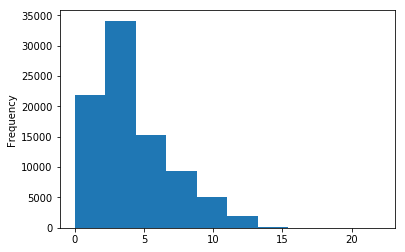

In [86]:
df.token_str.str.len().plot.hist()

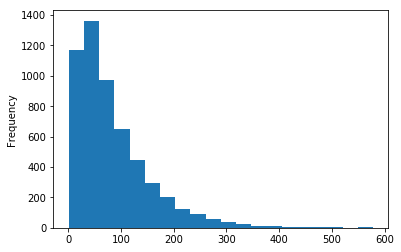

In [87]:
sents.content.str.len().plot.hist(bins=20)

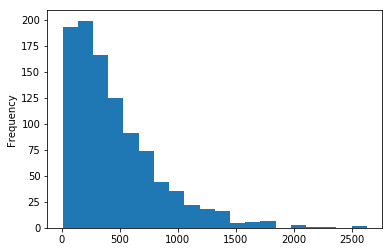

In [88]:
paras.content.str.len().plot.hist(bins=20)

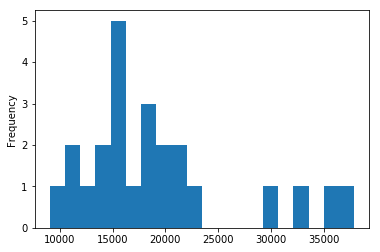

In [89]:
chaps.content.str.len().plot.hist(bins=20)